<a href="https://colab.research.google.com/github/alexbrill/tf-train/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
print(train_data.shape)
print(test_data.shape)
print(test_targets)

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
from tensorflow import keras

def build():
  model = keras.Sequential()
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  #model.add(keras.layers.LayerNormalization())
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [5]:
model = build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

processing fold #0


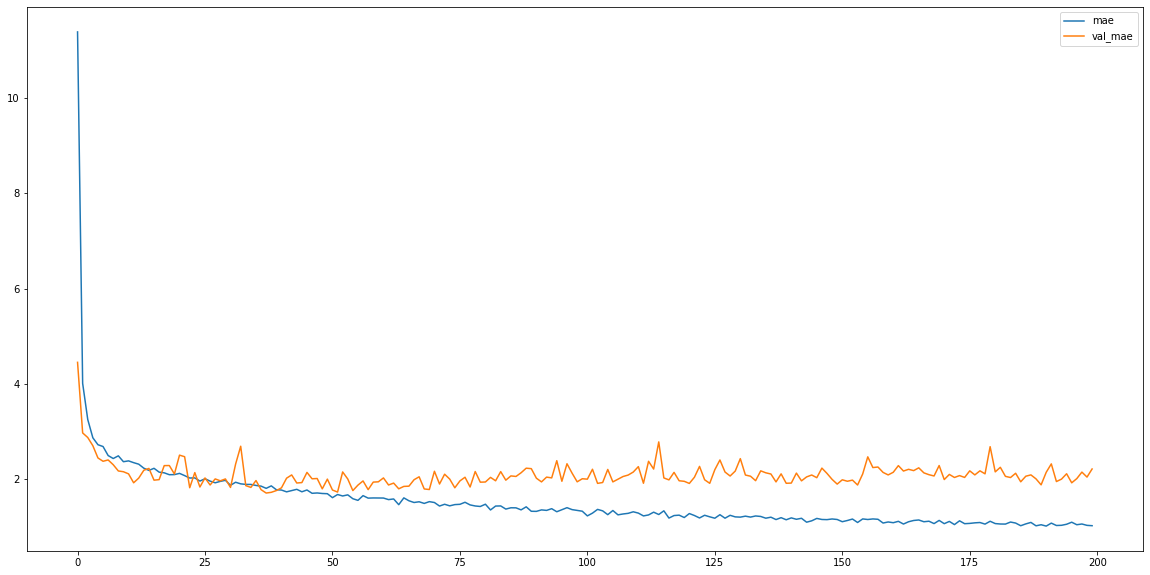

processing fold #1


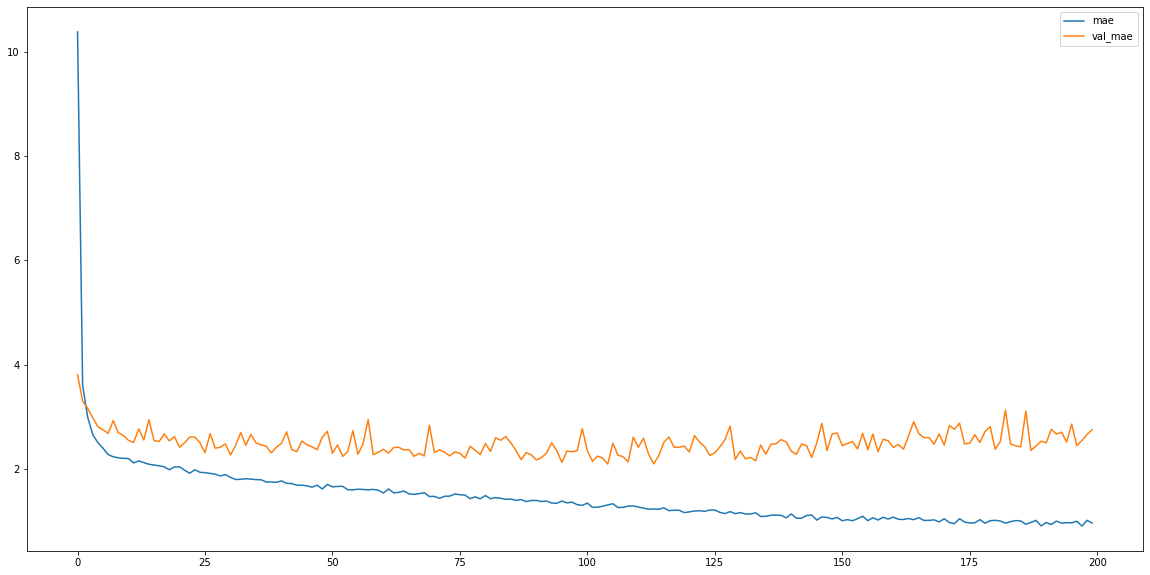

processing fold #2


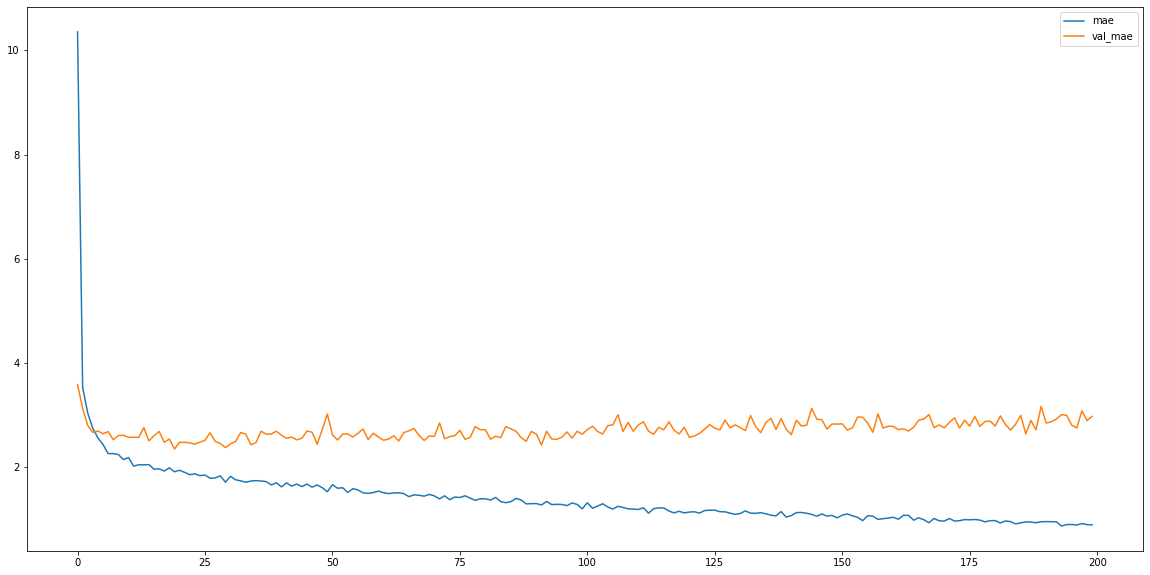

processing fold #3


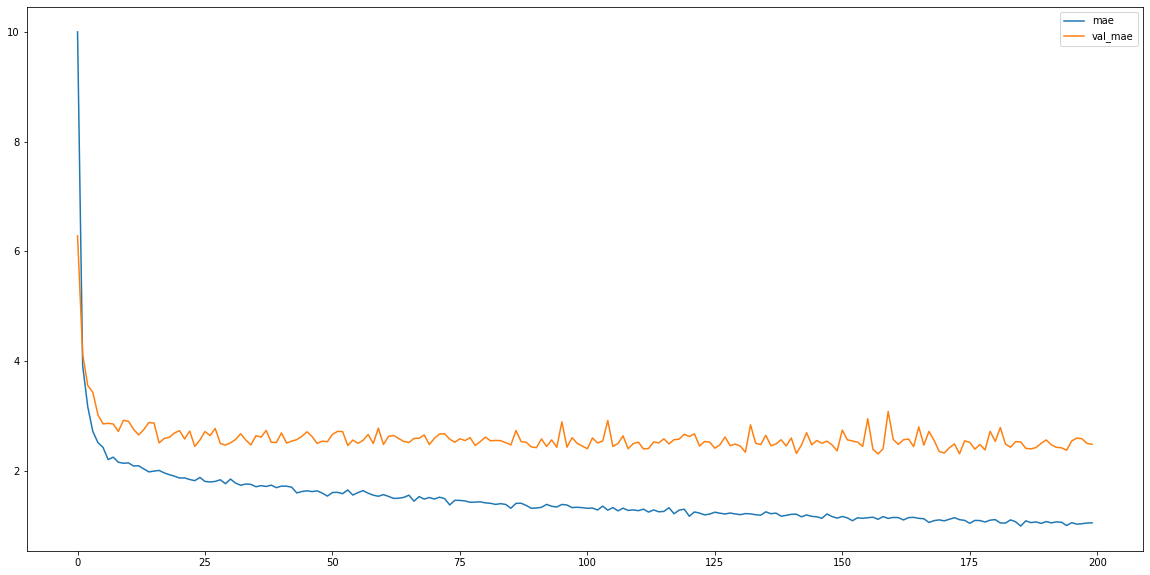

2.6081897616386414


In [19]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores = []

for i in range(k):
    print(f'processing fold #{i}')

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                         axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build()
    hist = model.fit(partial_train_data,
                     partial_train_targets,
                     epochs=num_epochs,
                     validation_data=(val_data, val_targets),
                     batch_size=1,
                     verbose=0)

    plt.plot(range(num_epochs), hist.history['mae'], label='mae')
    plt.plot(range(num_epochs), hist.history['val_mae'], label='val_mae')

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

    plt.legend()
    plt.show()

print(np.mean(all_scores))

In [24]:
def run_cv(k=4):
  num_val_samples = len(train_data) // k
  num_epochs = 50
  all_scores = []

  for i in range(k):
      #print(f'processing fold #{i}')

      val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
      val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

      partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                          train_data[(i + 1) * num_val_samples:]],
                                          axis=0)
      partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                              train_targets[(i + 1) * num_val_samples:]], axis=0)

      model = build()
      model.fit(partial_train_data,
                      partial_train_targets,
                      epochs=num_epochs,
                      validation_data=(val_data, val_targets),
                      batch_size=1,
                      verbose=0)


      val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
      all_scores.append(val_mae)

  print(np.mean(all_scores))

In [27]:
def run_cv_plots(k=4):
  num_val_samples = len(train_data) // k
  num_epochs = 50
  all_scores = []

  for i in range(k):
      #print(f'processing fold #{i}')

      val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
      val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

      partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                          train_data[(i + 1) * num_val_samples:]],
                                          axis=0)
      partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                              train_targets[(i + 1) * num_val_samples:]], axis=0)

      model = build()
      hist = model.fit(partial_train_data,
                      partial_train_targets,
                      epochs=num_epochs,
                      validation_data=(val_data, val_targets),
                      batch_size=1,
                      verbose=0)
      
      plt.plot(range(num_epochs), hist.history['mae'], label='mae')
      plt.plot(range(num_epochs), hist.history['val_mae'], label='val_mae')


      val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
      all_scores.append(val_mae)

      plt.legend()
      plt.show()

  print(np.mean(all_scores))

In [25]:
for k in range(2, 7):
  print(f'Running with {k} folds')
  run_cv(k)

Running with 2 folds
2.5377745628356934
Running with 3 folds
2.443972110748291
Running with 4 folds
2.3273269832134247
Running with 5 folds
2.4076532125473022
Running with 6 folds
2.377406279246012


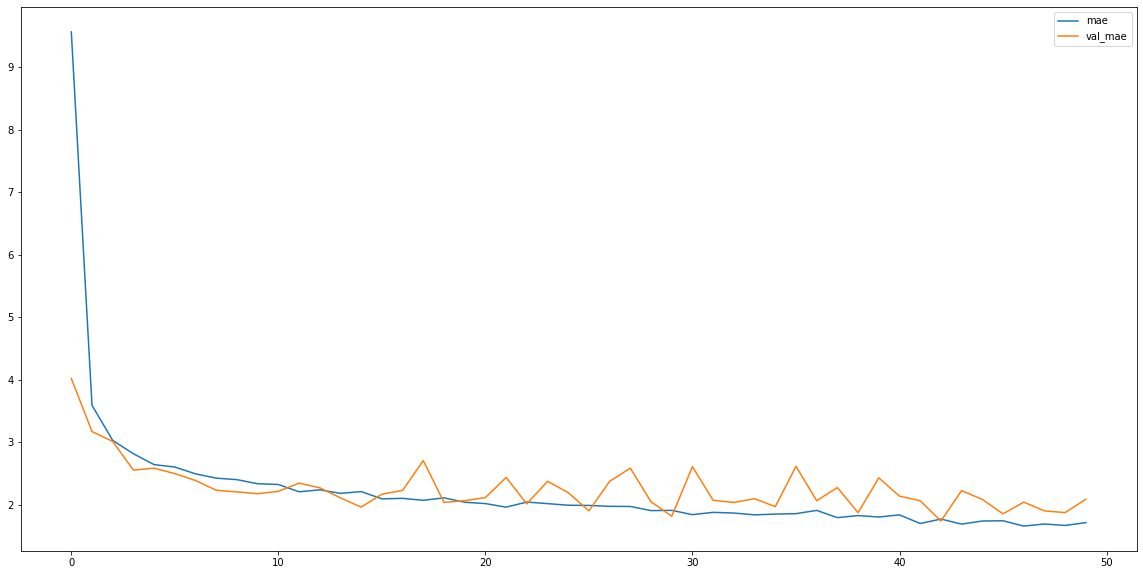

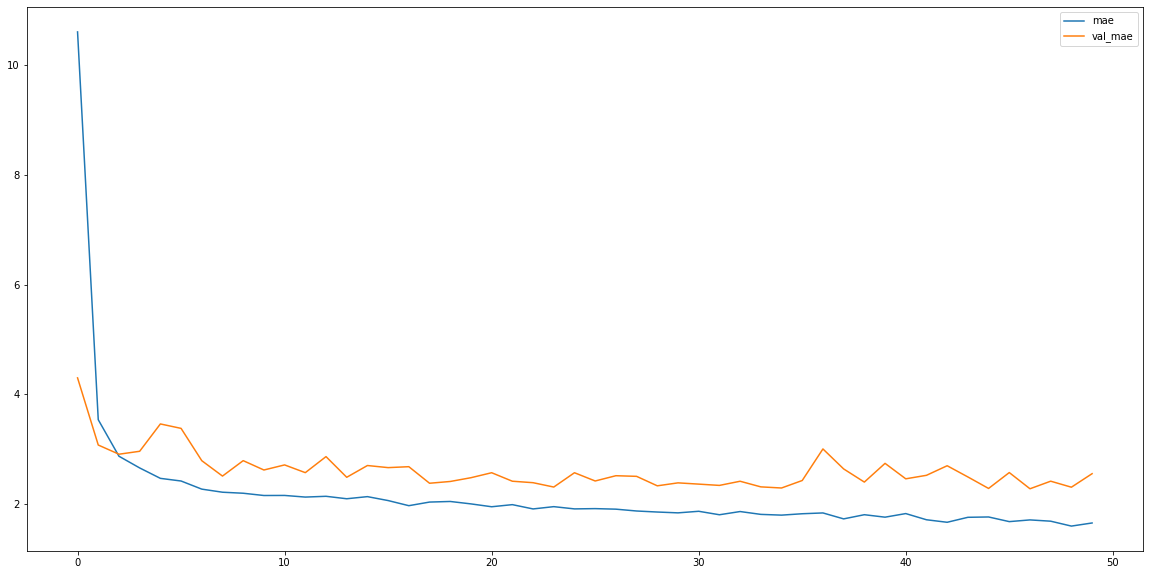

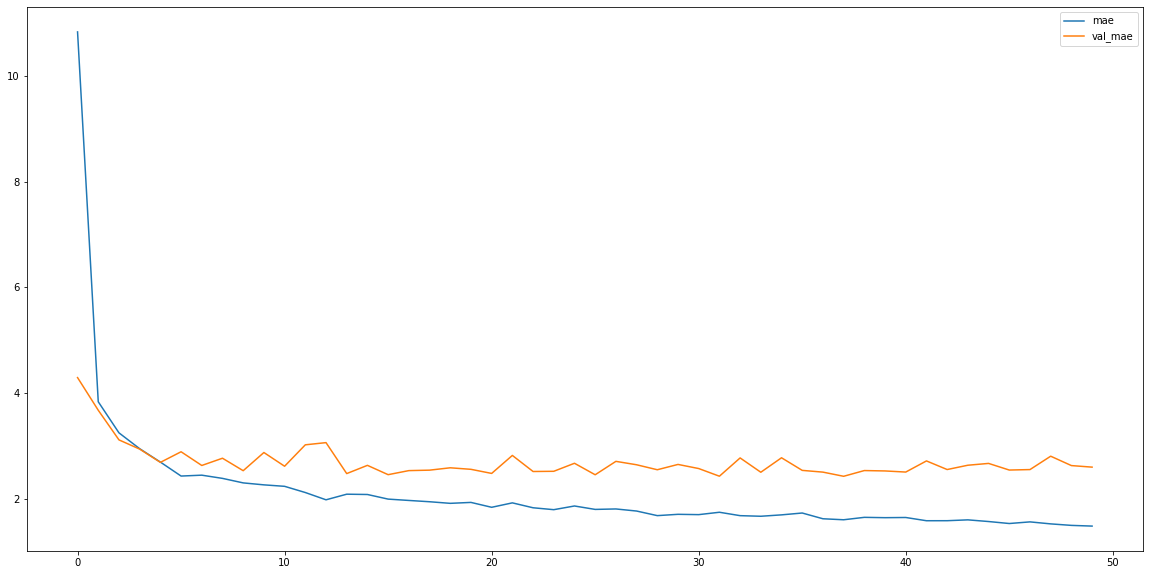

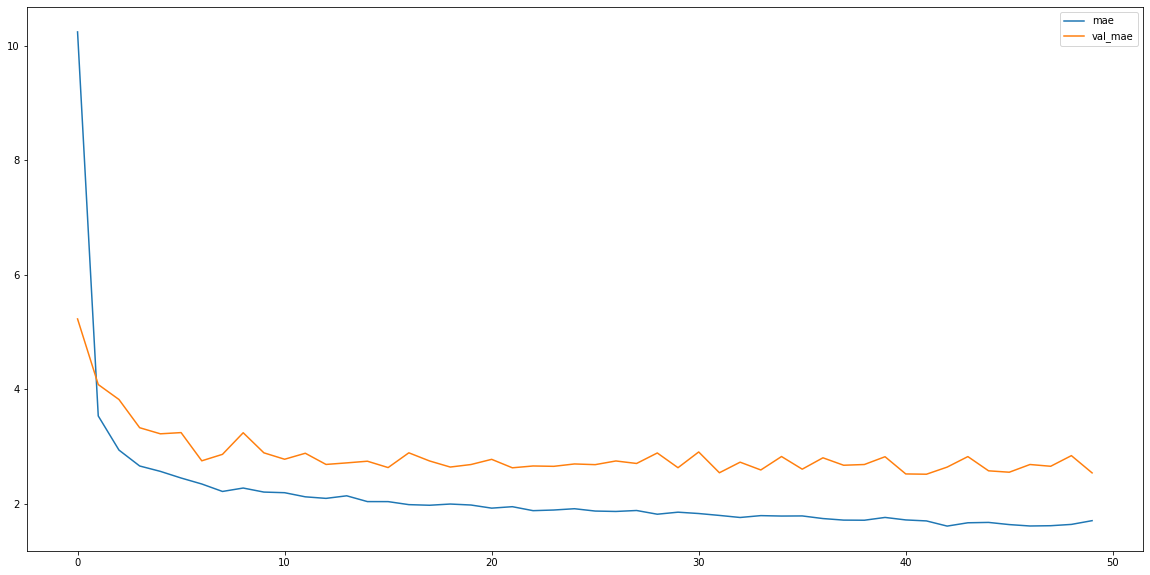

2.443464457988739


In [28]:
run_cv_plots(4)

In [10]:
all_scores

[2.1907734870910645, 2.4791202545166016, 2.7273378372192383, 2.456467390060425]